### TensorFlow 기초 연산.

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
# 버전 확인.
print(tf.__version__)

2.9.1


#### 1. Hello World!

In [3]:
# tf.constant 사용.
# immutable 객체.
hello = tf.constant("Hello World!")
print("타입                      : ", type(hello))
print("그대로 출력               : ", hello)
print("Numpy 배열로 변환 후 출력 : ", hello.numpy())
print(f"f-string 사용해서 출력    :  {hello}")

타입                      :  <class 'tensorflow.python.framework.ops.EagerTensor'>
그대로 출력               :  tf.Tensor(b'Hello World!', shape=(), dtype=string)
Numpy 배열로 변환 후 출력 :  b'Hello World!'
f-string 사용해서 출력    :  b'Hello World!'


#### 2. Tensor 생성:

In [4]:
# Numpy 배열을 Tensor로 변환.
x = np.array([[1,2,3,4,5], [6,7,8,9,10]])
tf.convert_to_tensor(x)

<tf.Tensor: shape=(2, 5), dtype=int32, numpy=
array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])>

In [5]:
# 다양한 tensor를 만들어 본다.
hello = tf.constant("Hello World!")                         # String tensor.
const_scalar = tf.constant(7)                               # A scalar tensor.
const_matrix = tf.constant([[1,2], [3,4]])                  # A matrix tensor.
mat_fill = tf.fill((4,4),9)                                 # A 4x4 tensor filled with 9s.
mat_zeros = tf.zeros((3,3))                                 # A 3x3 tensor filled with 0s.
mat_ones = tf.ones((5,5))                                   # A 5x5 tensor filled with 1s.
mat_randn = tf.random.normal((3,3), mean=0, stddev=1.0)     # 3x3 random normal tensor.
mat_randu = tf.random.uniform((4,4), minval=0, maxval=1.0)  # 4x4 random uniform tensor.

In [6]:
my_tensors=[hello, const_scalar, const_matrix, mat_fill, mat_zeros, mat_ones, mat_randn, mat_randu]
for a_tensor in my_tensors:
    print(a_tensor)
    print("\n")

tf.Tensor(b'Hello World!', shape=(), dtype=string)


tf.Tensor(7, shape=(), dtype=int32)


tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


tf.Tensor(
[[9 9 9 9]
 [9 9 9 9]
 [9 9 9 9]
 [9 9 9 9]], shape=(4, 4), dtype=int32)


tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(3, 3), dtype=float32)


tf.Tensor(
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]], shape=(5, 5), dtype=float32)


tf.Tensor(
[[ 0.21386713 -0.6922772   0.4647702 ]
 [ 1.9044816   0.62576914  0.6687334 ]
 [-0.2931208   0.49695233 -0.63667506]], shape=(3, 3), dtype=float32)


tf.Tensor(
[[0.24052465 0.6955168  0.57185924 0.31282055]
 [0.9652113  0.12591422 0.31103504 0.6349627 ]
 [0.73591316 0.5340662  0.396078   0.7894006 ]
 [0.92820406 0.56807077 0.0975374  0.1435529 ]], shape=(4, 4), dtype=float32)




#### 3. 수학 연산:

In [7]:
n1 = tf.constant(1)
n2 = tf.constant(2)
n3 = n1 + n2
n3.numpy()

3

In [8]:
n1 = tf.constant(4)
n2 = tf.constant(5)
n3 = tf.add(n1,n2)
n3.numpy()

9

In [9]:
n1 = tf.constant(2)
n2 = tf.constant(3)
n3 = tf.multiply(n1,n2)
print(f"{n3}")

6


In [10]:
n1 = tf.constant(2)
n2 = tf.constant(3)
n3 = tf.pow(n1,n2)
print(f"{n3}")

8


#### 4. 행렬 연산:

In [11]:
# 행렬 곱.
m1 = tf.constant([[1,2], [3,4]],dtype=tf.float32)
m2 = tf.constant([[1], [2]],dtype=tf.float32)
m3 = tf.linalg.matmul(m1, m2)                            
print(f"{m3}")

[[ 5.]
 [11.]]


In [12]:
# 행렬 곱.
m1 = tf.constant([[1,2], [3,4]],dtype=tf.int32)
m2 = tf.constant([[5, 6], [7, 8]],dtype=tf.int32)
m3 = tf.linalg.matmul(m1, m2)
print(f"{m3}")

[[19 22]
 [43 50]]


In [13]:
# Element-wise multiplication.
m3 = tf.multiply(m1, m2)
print(f"{m3}")

[[ 5 12]
 [21 32]]


In [14]:
# Element-wise multiplication.
m3 = m1 * m2
print(f"{m3}")

[[ 5 12]
 [21 32]]


In [15]:
# Element-wise sum.
m3 = m1 + m2
print(f"{m3}")

[[ 6  8]
 [10 12]]


In [16]:
# Element-wise subtraction.
m3 = m1 - m2
print(f"{m3}")

[[-4 -4]
 [-4 -4]]


In [17]:
# Element-wise division.
m3 = m1 / m2
print(f"{m3}")

[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [18]:
# 행렬 함수.
m = tf.constant([[1.0,2.0],[3.0,4.0]], dtype=tf.float32)
m_diagonal = tf.linalg.tensor_diag([1,2,3])
m_transpose = tf.transpose(m)
m_inverse = tf.linalg.inv(m)
m_multiplied = tf.linalg.matmul(m, m_inverse)
m_determinant = tf.linalg.det(m)
my_matrices = [m, m_diagonal, m_transpose, m_inverse, m_multiplied, m_determinant]
for a_matrix in my_matrices:
    print(f"{a_matrix}")
    print("\n")

[[1. 2.]
 [3. 4.]]


[[1 0 0]
 [0 2 0]
 [0 0 3]]


[[1. 3.]
 [2. 4.]]


[[-2.0000002   1.0000001 ]
 [ 1.5000001  -0.50000006]]


[[ 1.0000000e+00  0.0000000e+00]
 [-4.7683716e-07  1.0000002e+00]]


-2.0




#### 5. TensorFlow가 제공하는 데이터셋:

보스톤 인근의 집값 데이터. 변수의 이름 등의 자세한 설명은 [이곳](http://lib.stat.cmu.edu/datasets/boston)을 참고한다.

In [19]:
from tensorflow.keras.datasets.boston_housing import load_data

In [20]:
# 데이터 가져오기.
(X_train, y_train), (X_test, y_test) = load_data(test_split=0.3, seed=1234)
print(type(X_train))                 

57026/57026 [==============================] - 0s 0us/step
<class 'numpy.ndarray'>


In [21]:
# Shape 확인.
print("-"*50)
print("Training data X shape: {}".format(X_train.shape))
print("Training data y shape: {}".format(y_train.shape))
print("-"*50)
print("Test data X shape: {}".format(X_test.shape))
print("Test data y shape: {}".format(y_test.shape))
print("-"*50)

--------------------------------------------------
Training data X shape: (354, 13)
Training data y shape: (354,)
--------------------------------------------------
Test data X shape: (152, 13)
Test data y shape: (152,)
--------------------------------------------------


Fashion 아이템 이미지 데이터. 변수의 이름 등의 자세한 설명은 [이곳](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data)을 참고한다.

In [22]:
from tensorflow.keras.datasets.fashion_mnist import load_data
import matplotlib.pyplot as plt
import random

In [23]:
# 데이터 가져오기.
(X_train, y_train), (X_test, y_test) = load_data()    # test_split 인자가 필요 없음!!!
print(type(X_train)) 

<class 'numpy.ndarray'>


In [24]:
# Shape 확인.
print("-"*50)
print("Training data X shape: {}".format(X_train.shape))
print("Training data y shape: {}".format(y_train.shape))
print("-"*50)
print("Test data X shape: {}".format(X_test.shape))
print("Test data y shape: {}".format(y_test.shape))
print("-"*50)

--------------------------------------------------
Training data X shape: (60000, 28, 28)
Training data y shape: (60000,)
--------------------------------------------------
Test data X shape: (10000, 28, 28)
Test data y shape: (10000,)
--------------------------------------------------


In [25]:
# 고유한 y 변수의 유형 확인.
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [26]:
name_dict = {0:"T-shirt/top", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat", 5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle boot"}

Shirt


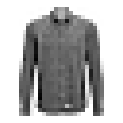

Sandal


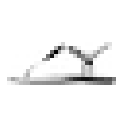

Bag


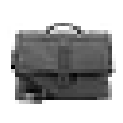

Ankle boot


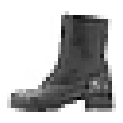

Trouser


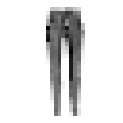

Shirt


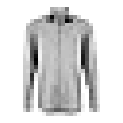

Dress


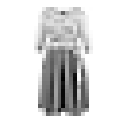

Coat


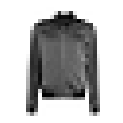

Ankle boot


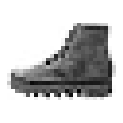

Coat


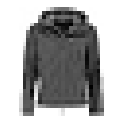

In [27]:
# 이미지 데이터 시각화 (10개).
for i_image in [ random.randint(0,59999) for _ in range(10)]:
    print(name_dict[y_train[i_image]])
    plt.figure(figsize=(2,2))
    plt.imshow(X_train[i_image,:,:],cmap="Greys")
    plt.axis("off")
    plt.show()

MNIST 손글씨 이미지 데이터. 

In [28]:
from tensorflow.keras.datasets.mnist import load_data

In [29]:
# 데이터 가져오기.
(X_train, y_train), (X_test, y_test) = load_data()
n_train_size = X_train.shape[0]

In [30]:
# Shape 확인.
print("-"*50)
print("Training data X shape: {}".format(X_train.shape))
print("Training data y shape: {}".format(y_train.shape))
print("-"*50)
print("Test data X shape: {}".format(X_test.shape))
print("Test data y shape: {}".format(y_test.shape))
print("-"*50)

--------------------------------------------------
Training data X shape: (60000, 28, 28)
Training data y shape: (60000,)
--------------------------------------------------
Test data X shape: (10000, 28, 28)
Test data y shape: (10000,)
--------------------------------------------------


3


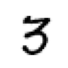

4


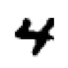

6


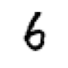

9


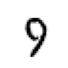

0


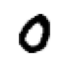

In [31]:
# 이미지 데이터 시각화 (5개).
for i_image in [ random.randint(0,59999) for _ in range(5)]:
    print(y_train[i_image])
    plt.figure(figsize=(1,1))
    plt.imshow(X_train[i_image,:,:],cmap="Greys")
    plt.axis("off")
    plt.show()